In [2]:
# Importamos librerías necesarias
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

Función de coste: $ F(x) = \sin\left(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3 \right) \cos\left(2x + 1 - e^y \right) $

In [22]:
# Definimos la función de coste
func = lambda th: np.sin(1 / 2 * th[0] ** 2 - 1 / 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])

In [4]:
# Definimos resolución de los ejes y matriz para los valores de la función de coste
res = 100
_X = np.linspace(-3, 3, res)
_Y = np.linspace(-3, 3, res)
_Z = np.zeros((res, res))

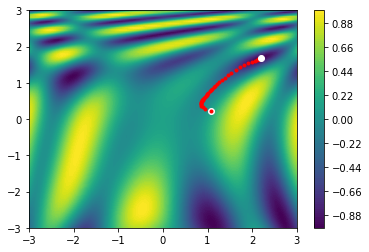

In [35]:
# Calculamos matriz de valores para el error de la función de coste
for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x, y])
        
# Visualizamos el resultado de los cálculos
#plt.contour(_X, _Y, _Z, 100)
plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()

# Asignamos una posición aleatoria al punto de orígen
Theta = np.random.rand(2) * 4 - 2
_T = np.copy(Theta)

# Visualizamos el punto aleatorio que acabamos de crear
plt.plot(Theta[0], Theta[1], "o", c="white")

# Definimos incremento, ratio de aprendizaje y número de iteraciones
h = 0.001
lr = 0.0015
iterations = 10000

# Inicializamos el vector gradiente
grad = np.zeros(2)

for _ in range(iterations):
    for it, th in enumerate(Theta):
        _T = np.copy(Theta)
        _T[it] = _T[it] + h
        deriv = (func(_T) - func(Theta)) / h
        grad[it] = deriv
        
    Theta = Theta - lr * grad

    # Cada 100 iteraciones pintamos la posición actual del punto en el gradiente
    if (_ % 100 == 0):
        plt.plot(Theta[0], Theta[1], ".", c="red")

# Representamos todo el gráfico definido anteriormente
plt.plot(Theta[0], Theta[1], "o", c="white")
plt.show()